# Getting Data - Part 2 



Information comes from Ch 9 of Data Science from Scratch, 2nd Edition by Joel Grus.  This book is available for free through the library's connection to O'reilly's learning platform.

In [1]:
import pandas as pd 
import re
from IPython.display import Image

## Web Scraping

Some examples adapted from [http://web.stanford.edu/~zlotnick/TextAsData/Web_Scraping_with_Beautiful_Soup.html](http://web.stanford.edu/~zlotnick/TextAsData/Web_Scraping_with_Beautiful_Soup.html) *Note, the site is now unavailable*. 




We now are going to be working with 3 new libraries: 

* `beautifulsoup4` 
* `requests` 
* `html5lib` 



In [2]:
from bs4 import BeautifulSoup
import requests

**Caution**

It is impolite or potentially illegal to scrap a site.  Most sites have a *robots.txt* file that indicates how frequently you may scrape a site (and which paths you're not supposed to scrape). 

Be respectful of these limits.

In [3]:
response = requests.get("https://en.wikipedia.org/robots.txt")
txt = response.text
print(txt)

﻿# robots.txt for http://www.wikipedia.org/ and friends
#
# Please note: There are a lot of pages on this site, and there are
# some misbehaved spiders out there that go _way_ too fast. If you're
# irresponsible, your access to the site may be blocked.
#

# Observed spamming large amounts of https://en.wikipedia.org/?curid=NNNNNN
# and ignoring 429 ratelimit responses, claims to respect robots:
# http://mj12bot.com/
User-agent: MJ12bot
Disallow: /

# advertising-related bots:
User-agent: Mediapartners-Google*
Disallow: /

# Wikipedia work bots:
User-agent: IsraBot
Disallow:

User-agent: Orthogaffe
Disallow:

# Crawlers that are kind enough to obey, but which we'd rather not have
# unless they're feeding search engines.
User-agent: UbiCrawler
Disallow: /

User-agent: DOC
Disallow: /

User-agent: Zao
Disallow: /

# Some bots are known to be trouble, particularly those designed to copy
# entire sites. Please obey robots.txt.
User-agent: sitecheck.internetseer.com
Disallow: /

User-agent: 

### Example 1 

Lets' look at another site.  

In [4]:
resp = requests.get("http://www.example.com")
resp

<Response [200]>

In [6]:
resp.text

'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 2em;\n        background-color: #fdfdff;\n        border-radius: 0.5em;\n        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        div {\n            margin: 0 auto;\n            width: auto;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\n    <

In [5]:
html = requests.get("http://www.example.com").text
html

'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 2em;\n        background-color: #fdfdff;\n        border-radius: 0.5em;\n        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        div {\n            margin: 0 auto;\n            width: auto;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\n    <

In [ ]:
resp.text

In [7]:
soup = BeautifulSoup(html, 'html5lib')
soup

<!DOCTYPE html>
<html><head>
    <title>Example Domain</title>

    <meta charset="utf-8"/>
    <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
    <meta content="width=device-width, initial-scale=1" name="viewport"/>
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>    
</head>

<body>
<div>
    <h1>Example Domain</h1>
    <p>This domain is

Most web browsers read in the HTML and parse it into a **DOM** (Document Object Model) structure, then renders the **DOM** structure. 

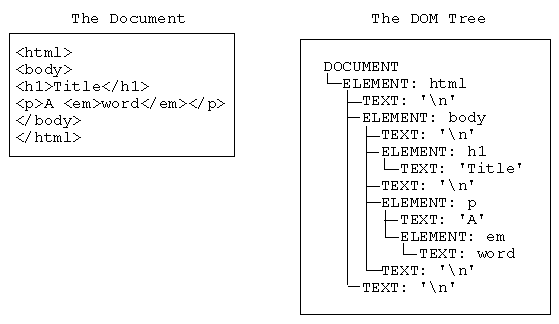

In [8]:
#from IPython.display import Image
Image('http://www.cs.toronto.edu/~shiva/cscb07/img/dom/treeStructure.png')

Typically, we want to find things using either the text on the page or `Tag` objects. 

For example, let's find the first `<p>` tag and its contents on the page: 

In [9]:
first_p = soup.find('p')

In [10]:
first_p

<p>This domain is for use in illustrative examples in documents. You may use this
    domain in literature without prior coordination or asking for permission.</p>

In [11]:
type(first_p)

bs4.element.Tag

In [12]:
first_p = soup.p
first_p

<p>This domain is for use in illustrative examples in documents. You may use this
    domain in literature without prior coordination or asking for permission.</p>

You can access the text within the `<p>` or other `Tag`s using the `text` property:

In [13]:
first_p_text = soup.p.text
first_p_text

'This domain is for use in illustrative examples in documents. You may use this\n    domain in literature without prior coordination or asking for permission.'

In [14]:
type(first_p_text)

str

You can get individual words using the string `split` function: 

In [16]:
first_p_words = first_p.text.split()
first_p_words

['This',
 'domain',
 'is',
 'for',
 'use',
 'in',
 'illustrative',
 'examples',
 'in',
 'documents.',
 'You',
 'may',
 'use',
 'this',
 'domain',
 'in',
 'literature',
 'without',
 'prior',
 'coordination',
 'or',
 'asking',
 'for',
 'permission.']

You can extract a tag's attributes by treating it like a `dict`:

In [17]:
first_p_id = soup.p['id']  # raise a key error if no "id"

KeyError: 'id'

In [20]:
first_p_id = soup.p.get('id')
print(first_p_id)

None


In [21]:
first_meta_content = soup.meta.get('charset')
first_meta_content

'utf-8'

You can get multiple tags at once:

In [22]:
all_p = soup.find_all('p')

In [23]:
all_p

[<p>This domain is for use in illustrative examples in documents. You may use this
     domain in literature without prior coordination or asking for permission.</p>,
 <p><a href="https://www.iana.org/domains/example">More information...</a></p>]

In [24]:
len(all_p)

2

In [25]:
for p in soup.find_all('p'):
    print(p.text)

This domain is for use in illustrative examples in documents. You may use this
    domain in literature without prior coordination or asking for permission.
More information...


### Example 2 

Let's look at another example. 

In [26]:
url = "https://slashdot.org/index2.pl?fhfilter=python"
soup = BeautifulSoup(requests.get(url).text, 'html5lib')

In [27]:
soup

<!-- html-header type=current begin --><!DOCTYPE html>
<html lang="en"><head>
	<!-- Render IE9 -->
	<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>

	

	<script id="before-content" type="text/javascript">
(function () {
    if (typeof window.sdmedia !== 'object') {
         window.sdmedia = {};
    }
    if (typeof window.sdmedia.site !== 'object') {
        window.sdmedia.site = {};
    }

    var site = window.sdmedia.site;
    site.rootdir = "//slashdot.org";
}());

var pageload = {
	pagemark: '957609422781104318',
	before_content: (new Date).getTime()
};
function pageload_done( $, console, maybe ){
	pageload.after_readycode	= (new Date).getTime();
	pageload.content_ready_time	= pageload.content_ready - pageload.before_content;
	pageload.script_ready_time	= pageload.after_readycode - pageload.content_ready;
	pageload.ready_time		= pageload.after_readycode - pageload.before_content;
	// Only report 1% of cases.
	maybe || (Math.random()>0.01) || $.ajax({ type: 'POST', 

It is often very useful to look at the pages source (methods to do this in Safari, Chrome, Firefox, IE, etc.)

https://slashdot.org/index2.pl?fhfilter=python

Here is some of the relevant sections (note the example was adapted somewhat to remove some extra whitespace): 

```html
<article onclick="javascript:return false;"  id="firehose-166258475" data-fhid="166258475" data-fhtype="story" class="fhitem fhitem-story briefarticle usermode thumbs grid_24">
		<span class="sd-info-block" style="display: none">
			<span class="sd-key-firehose-id">166258475</span>
			<span class="type">story</span>
			
		</span>

<header>
	
		<span class="topic" id="topic-166258475">
			<a href="//slashdot.org/index2.pl?fhfilter=censorship" onclick="return addfhfilter('censorship');">
			
				<img src="//a.fsdn.com/sd/topics/censorship_64.png" width="64" height="64" alt="Censorship" title="Censorship">
			
		</a>
		</span>
	

	<h2 class="story">
		<span id="title-166258475" class="story-title"> <a onclick="return toggle_fh_body_wrap_return(this);"  href="//yro.slashdot.org/story/22/09/18/2246254/do-americas-free-speech-protections-protect-code---and-prevent-cryptocurrency-regulation">Do America's Free-Speech Protections Protect Code - and Prevent Cryptocurrency Regulation?</a> <span class=" no extlnk"><a class="story-sourcelnk" href="https://www.marketplace.org/shows/marketplace-tech/why-the-first-amendment-also-protects-code/"  title="External link - https://www.marketplace.org/shows/marketplace-tech/why-the-first-amendment-also-protects-code/" target="_blank"> (marketplace.org) </a></span></span>
		<!--<span class="comments commentcnt-166258475" >64</span>-->
		<!-- comment bubble -->
		
			<span class="comment-bubble"><a href="//yro.slashdot.org/story/22/09/18/2246254/do-americas-free-speech-protections-protect-code---and-prevent-cryptocurrency-regulation#comments" title="">64</a></span>
		
	</h2>
	<div class="details" id="details-166258475">
		<span class="story-details">
		<span class="story-views">
			<span class="sodify" onclick="firehose_set_options('color', 'red')" title="Filter Firehose to entries rated red or better"></span><span class="icon-beaker pop1 " alt="Popularity" title="Filter Firehose to entries rated red or better" onclick="firehose_set_options('color', 'red')"><span></span></span> 
		</span>
		</span>
		<span class="story-byline">			
			Posted
				by 	
				  EditorDavid
	
		<time id="fhtime-166258475" datetime="on Sunday September 18, 2022 @06:51PM">on Sunday September 18, 2022 @06:51PM</time>	
			 from the <span class="dept-text">million-dollar-questions</span> dept.
		
		</span>
	</div>
</header>

<div class="hide" id="fhbody-166258475">
	

	
		
		<div id="text-166258475" class="p">
			...
		</div>

	</div>
	<aside class="novote">
		
	</aside>
		<footer class="clearfix meta article-foot">
			<div class="story-controls">
			</div>
			
				<div class="story-tags">
					<span class="tright tags"><menu type="toolbar" class="edit-bar">
		<span id="tagbar-166258475" class="tag-bar none">
			<a  class="topic tag" rel="statictag" href="//slashdot.org/tag/" target="_blank"></a>

		</span>
		<div class="tag-menu">
			<input class="tag-entry default" type="text" value="apply tags">
		</div>
	</menu></span>
				</div>
		</footer>
	
	</article><article onclick="javascript:return false;"  id="firehose-166233741" data-fhid="166233741" data-fhtype="story" class="fhitem fhitem-story briefarticle usermode thumbs grid_24">
		<span class="sd-info-block" style="display: none">
			<span class="sd-key-firehose-id">166233741</span>
			<span class="type">story</span>
			
		</span>


```

It looks like each item returned is listed by the `article` tag with the class `fhitem`. 

In [ ]:
soup

In [28]:
articles = soup('article', 'fhitem')
print(len(articles))

20


 
Let's try to collect for each news story: the title, the author (who posted it), and the number of comments. 

In [32]:
articles = soup('article', 'fhitem')
for a in articles: 
    # get title, title inside <span class="story-title"> stored as text in link. 
    title = a.find('span', 'story-title').a.text.strip()
    print(title)
    # get author inside <span class="story-byline"> 
    author = a.find('span', 'story-byline').text
    print(author)
    # get the number of comments <span class="comment-bubble"> stored as text in link.
    comments = a.find('span', 'comment-bubble').a.text
    print(comments)

Here's What's New in Python 3.12

	
				
			Posted
				by 
		
		
			
				  EditorDavid
			
		
		

		
		
		on Sunday October 01, 2023 @10:34AM
		
		
			 from the Python-programming dept.
		
		
39
Microsoft To Excel Users: Be Careful With That Python

	
				
			Posted
				by 
		
		
			
				  EditorDavid
			
		
		

		
		
		on Saturday September 30, 2023 @04:34PM
		
		
			 from the back-in-your-cell dept.
		
		
46
JetBrains Previews 'RustRover', a New Dedicated IDE for Rust Developers

	
				
			Posted
				by 
		
		
			
				  EditorDavid
			
		
		

		
		
		on Monday September 18, 2023 @01:34AM
		
		
			 from the inventing-IDEs dept.
		
		
48
IEEE Specctrum Announces Top Programming Languages of 2023: Python and SQL

	
				
			Posted
				by 
		
		
			
				  EditorDavid
			
		
		

		
		
		on Monday September 11, 2023 @03:34AM
		
		
			 from the popularity-contest dept.
		
		
102
Google Launches BigQuery Studio, a New Way To Work With Data

	
				
			Posted
				by 
		
		
			
				  BeauHD
			


When writing code using an iterator, remember you can always test it for a single or few cases: 

In [33]:
articles = soup('article', 'fhitem')
story = articles[1]
story

<article class="fhitem fhitem-story briefarticle usermode thumbs grid_24" data-fhid="171927057" data-fhtype="story" id="firehose-171927057" onclick="javascript:return false;">
		<span class="sd-info-block" style="display: none">
			<span class="sd-key-firehose-id">171927057</span>
			<span class="type">story</span>
			
		</span>







	
	

<header>
	
		<span class="topic" id="topic-171927057">
			<a href="//slashdot.org/index2.pl?fhfilter=python" onclick="return addfhfilter('python');">
			
				<img alt="Python" height="64" src="//a.fsdn.com/sd/topics/python_64.png" title="Python" width="64"/>
			
		</a>
		</span>
	

	<h2 class="story">
		

		

		
		

		

		

		

		<span class="story-title" id="title-171927057"> <a href="//developers.slashdot.org/story/23/09/30/1842233/microsoft-to-excel-users-be-careful-with-that-python" onclick="return toggle_fh_body_wrap_return(this);">Microsoft To Excel Users: Be Careful With That Python</a> <span class="no extlnk"><a class="story-sourcelnk" href=

In [34]:
author = story.find('span', 'story-byline').text
print(author)


	
				
			Posted
				by 
		
		
			
				  EditorDavid
			
		
		

		
		
		on Saturday September 30, 2023 @04:34PM
		
		
			 from the back-in-your-cell dept.
		
		


We may want to think about how to strip the Posted by, time and extra white space from the author information. 


In [35]:
author = story.find('span', 'story-byline').text
print(author)
aut = re.match(r'\s+Posted\s+by\s+(\w+)\s+on', author)
print(aut.group(1))


	
				
			Posted
				by 
		
		
			
				  EditorDavid
			
		
		

		
		
		on Saturday September 30, 2023 @04:34PM
		
		
			 from the back-in-your-cell dept.
		
		
EditorDavid


Let's create a data frame to store the news story information in. 

In [37]:
# create the data frame to store the information
df = pd.DataFrame(columns = ['Title', 'Author', 'Comments'],
                 index = range(0,len(articles)))

articles = soup('article', 'fhitem')
ai = 0
for a in articles: 
    
    # get title, title inside <span class="story-title"> stored as text in link. 
    title =  a.find('span', 'story-title').a.text.strip()
    #print(title)
    # get author inside <span class="story-byline"> 
    author = a.find('span', 'story-byline').text
    aut = re.match(r'\s+Posted\s+by\s+(\w+)\s+on', author)
    #print(author)
    # get the number of comments <span class="comment-bubble"> stored as text in link.
    comments = a.find('span', 'comment-bubble').a.text
    #print(comments)
    df.iloc[ai,0] = title
    df.iloc[ai,1] = aut.group(1)
    df.iloc[ai,2] = comments
    ai = ai+1
    
df

,Title,Author,Comments
0,Here's What's New in Python 3.12,EditorDavid,39
1,Microsoft To Excel Users: Be Careful With That...,EditorDavid,46
2,"JetBrains Previews 'RustRover', a New Dedicate...",EditorDavid,48
3,IEEE Specctrum Announces Top Programming Langu...,EditorDavid,102
4,"Google Launches BigQuery Studio, a New Way To ...",BeauHD,9
5,"Creators of Python, Java, TypeScript, and Smal...",EditorDavid,45
6,"Meta Releases Code Llama, a Code-Generating AI...",msmash,20
7,Microsoft Announces Python In Excel,msmash,92
8,"Google Launches Project IDX, a New AI-Enabled ...",BeauHD,17
9,Should a Variable's Type Come After Its Name?,EditorDavid,321


### Example 3 

Let's look at some data from the US Representatives - https://www.house.gov/representatives 

In [38]:
html = requests.get("https://www.house.gov/representatives").text
soup = BeautifulSoup(html, 'html5lib')
print (type(soup))

<class 'bs4.BeautifulSoup'>


In [39]:
# Examine the webpage (HTML)
print (soup.prettify()[0:1000])

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <link href="http://www.house.gov/representatives" rel="canonical"/>
  <meta content="Drupal 9 (https://www.drupal.org)" name="Generator"/>
  <meta content="width" name="MobileOptimized"/>
  <meta content="true" name="HandheldFriendly"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/sites/default/themes/housegov/favicon.ico" rel="icon" type="image/vnd.microsoft.icon"/>
  <title>
   Representatives | house.gov
  </title>
  <link href="/sites/default/files/css/css_IntMdVE6fdgOIcj92A676UGZ1cFHp6HEIHUr81bISjY.css" media="all" rel="stylesheet"/>
  <link href="/sites/default/files/css/css_eQ_OKtwXGsXH6ps1MHLkhBLVzUwX-7eX8usQYhShAUY.css" media="all" rel="stylesheet"/>
  <script>
   dataLayer = [];
  </script>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagNam

**Grab Representatives Websites**

Let's first just try to grab all the URLs linked from the page.

In [40]:
all_urls = [a['href'] 
            for a in soup('a')
            if a.has_attr('href')]

print(len(all_urls))

967


*ASIDE: List Comprehensives*

In [41]:
# As an aside we will use expressions as above extensively in this section.  
# Namely, list comprehensives 
evens = [a for a in range(10) if a % 2 == 0]
evens

[0, 2, 4, 6, 8]

In [42]:
odds = [i for i in range(10) if i % 2 == 1]
odds

[1, 3, 5, 7, 9]

In [43]:
print(all_urls[1:10])

['/', '/', '/representatives', '/leadership', '/committees', '/legislative-activity', '/the-house-explained', '/visitors', '/educators-and-students']


This is too many! First, some of these are relative links to this site, rather than the representative websites. 

In [44]:
# Let's examine the part of the HTML file that stores the tables
print (soup.prettify()[20000:23000])

2" id="view-value-2-table-column" scope="col">
                  District
                 </th>
                 <th class="views-field views-field-value-4" id="view-value-4-table-column" scope="col">
                  Name
                 </th>
                 <th class="views-field views-field-value-7" id="view-value-7-table-column" scope="col">
                  Party
                 </th>
                 <th class="views-field views-field-value-9" id="view-value-9-table-column" scope="col">
                  Office Room
                 </th>
                 <th class="views-field views-field-value-10" id="view-value-10-table-column" scope="col">
                  Phone
                 </th>
                 <th class="views-field views-field-markup" id="view-markup-table-column" scope="col">
                  Committee Assignment
                 </th>
                </tr>
               </thead>
               <tbody>
                <tr>
                 <td class="views

By looking at a number of the different links we want to find, we can see that most start with http:// or https:// and end with .house.gov or .house.gov/

Therefore, we should think about using a regular expression.

In [45]:
# Must start with http:// or https://
# Must end with .house.gov or .house.gov/
pat = r"^https?://.*\.house\.gov/?$"

In [46]:
# Let's check some tests! 
assert re.match(pat, "http://joel.house.gov")
assert re.match(pat, "https://joel.house.gov")
assert re.match(pat, "http://joel.house.gov/")
assert re.match(pat, "https://joel.house.gov/")
assert not re.match(pat, "joel.house.gov")
assert not re.match(pat, "http://joel.house.com")
assert not re.match(pat, "https://joel.house.gov/biography")
assert re.match(pat, "http://joel.lname.house.gov")

In [47]:
# And now apply
good_urls = [url for url in all_urls if re.match(pat, url)]
print(len(good_urls))

878


This is still a lot of urls.  

Let's try to trim this list. 

In [48]:
[i for i in range(len(good_urls)) if good_urls[i]== "https://barrymoore.house.gov"]

[1, 720]

There are multiple instances of the same url. 

Let's convert the list to a **set** to only consider the unique urls (get rid of duplicates). 

In [49]:
good_urls = list(set(good_urls))
print(len(good_urls))

439


This is getting really close, we expect to see 435, only a few extra.

Let's go forward at this point, we can always clean the list further as a next step.

Let's look at individual representative sites for links to press releases. For example:

In [50]:
html = requests.get('https://bergman.house.gov').text
soup = BeautifulSoup(html, 'html5lib')

# Use a set because the links might appear multiple times.
links = {a['href'] for a in soup('a') if 'press releases' in a.text.lower()}

print(links) # {'/media/press-releases'}

{'/news/documentquery.aspx?DocumentTypeID=27'}


Notice this is a relative link, which means we need to remember the originating site.

Let's put this together.

In [51]:
from typing import Dict, Set

press_releases: Dict[str, Set[str]] = {}

for house_url in good_urls:
    html = requests.get(house_url).text
    soup = BeautifulSoup(html, 'html5lib')
    pr_links = {a['href'] for a in soup('a') if 'press releases'
                                             in a.text.lower()}
    print(f"{house_url}: {pr_links}")
    press_releases[house_url] = pr_links

https://kiley.house.gov: set()
https://manning.house.gov: {'/media/press-releases'}
https://gooden.house.gov: {'/press-releases'}
https://lesko.house.gov: {'/press-releases'}
https://panetta.house.gov: {'/media/press-releases'}
https://robertgarcia.house.gov: {'/media/press-releases'}
https://meng.house.gov: {'/media-center/press-releases'}
https://goldman.house.gov: {'/media/press-releases'}
https://marymiller.house.gov: {'/media/press-releases', '/media/subscribe-press-releases'}
https://cartwright.house.gov: {'/news/documentquery.aspx?DocumentTypeID=2442'}
https://babin.house.gov: {'/news/documentquery.aspx?DocumentTypeID=27'}
https://courtney.house.gov/: {'/media-center/press-releases'}
https://mcgarvey.house.gov: {'/media/press-releases'}
https://mccollum.house.gov: {'/media/press-releases'}
https://walberg.house.gov/: {'/media/press-releases'}
https://menendez.house.gov: {'/media/press-releases'}
https://mccormick.house.gov: {'/media/press-releases'}
https://sherrill.house.gov/: 

### Example 4 

For this example, we want to scrape down an HTML table. 

Here we will look at a Wikipedia page: https://among-us.fandom.com/wiki/Tasks

We are interested in the Table tasks. 

In [52]:
html = requests.get("https://among-us.fandom.com/wiki/Tasks").text
soup = BeautifulSoup(html, 'html5lib')

We can find the table in the source code: 

```html 
<table class="wikitable sortable mw-collapsible">
<tbody><tr>
<th style="background:#C61111; color:white; min-width: 25%">Task
</th>
<th style="background:#C61111; color:white; min-width: 15%">Map
</th>
<th style="background:#C61111; color:white; min-width: 15%">Type
</th>
<th style="background:#C61111; color:white;">List of Steps
</th></tr>
<tr>
<td><a href="/wiki/Align_Engine_Output" title="Align Engine Output">Align Engine Output</a>
</td>
<td><a href="/wiki/The_Skeld" title="The Skeld">The Skeld</a>
</td>
<td>Long
</td>
<td style="padding-left: 10px;">
<ul><li><a href="/wiki/Upper_Engine" title="Upper Engine">Upper Engine</a></li>
<li><a href="/wiki/Lower_Engine" title="Lower Engine">Lower Engine</a></li></ul>
</td></tr>
<tr>
<td><a href="/wiki/Align_Telescope" title="Align Telescope">Align Telescope</a>
</td>
<td><a href="/wiki/Polus" title="Polus">Polus</a>
</td>
<td>Short
</td>
<td>
```

In [53]:
# Grab all instances within the HTML there is a 
#  <table class="wikitable list-table sortable mw-collapsible"> tag 
tasks_tab = soup.find_all("table", 
                          {"class": "wikitable list-table sortable mw-collapsible"})
tasks_tab


[<table class="wikitable list-table sortable mw-collapsible">
 <tbody><tr>
 <th style="min-width: 25%">Task
 </th>
 <th style="min-width: 15%">Map
 </th>
 <th style="min-width: 15%">Type
 </th>
 <th>List of steps
 </th></tr>
 <tr>
 <td><a href="/wiki/Align_Engine_Output" title="Align Engine Output">Align Engine Output</a>
 </td>
 <td><a href="/wiki/The_Skeld" title="The Skeld">The Skeld</a>
 </td>
 <td>Long
 </td>
 <td style="padding-left: 10px;">
 <ul><li><a href="/wiki/Upper_Engine" title="Upper Engine">Upper Engine</a></li>
 <li><a href="/wiki/Lower_Engine" title="Lower Engine">Lower Engine</a></li></ul>
 </td></tr>
 <tr>
 <td><a href="/wiki/Align_Telescope" title="Align Telescope">Align Telescope</a>
 </td>
 <td><a href="/wiki/Polus" title="Polus">Polus</a>
 </td>
 <td>Short
 </td>
 <td>
 <ul><li><a href="/wiki/Laboratory" title="Laboratory">Laboratory</a></li></ul>
 </td></tr>
 <tr>
 <td><a href="/wiki/Assemble_Artifact" title="Assemble Artifact">Assemble Artifact</a>
 </td>
 <td>

In [56]:
len(tasks_tab)

1

In [57]:
# How can we grab all the rows of the table? 
tasks_dat = tasks_tab[0].find_all("tr")
tasks_dat

[<tr>
 <th style="min-width: 25%">Task
 </th>
 <th style="min-width: 15%">Map
 </th>
 <th style="min-width: 15%">Type
 </th>
 <th>List of steps
 </th></tr>,
 <tr>
 <td><a href="/wiki/Align_Engine_Output" title="Align Engine Output">Align Engine Output</a>
 </td>
 <td><a href="/wiki/The_Skeld" title="The Skeld">The Skeld</a>
 </td>
 <td>Long
 </td>
 <td style="padding-left: 10px;">
 <ul><li><a href="/wiki/Upper_Engine" title="Upper Engine">Upper Engine</a></li>
 <li><a href="/wiki/Lower_Engine" title="Lower Engine">Lower Engine</a></li></ul>
 </td></tr>,
 <tr>
 <td><a href="/wiki/Align_Telescope" title="Align Telescope">Align Telescope</a>
 </td>
 <td><a href="/wiki/Polus" title="Polus">Polus</a>
 </td>
 <td>Short
 </td>
 <td>
 <ul><li><a href="/wiki/Laboratory" title="Laboratory">Laboratory</a></li></ul>
 </td></tr>,
 <tr>
 <td><a href="/wiki/Assemble_Artifact" title="Assemble Artifact">Assemble Artifact</a>
 </td>
 <td><a href="/wiki/MIRA_HQ" title="MIRA HQ">MIRA HQ</a>
 </td>
 <td>Sh

**Scrape Table into DataFrame**

Start with just the html in the table.

In [54]:
# Grab all instances within the HTML there is a 
#  <table class="wikitable list-table sortable mw-collapsible"> tag 
tasks_tab = soup.find_all("table", {"class": "wikitable list-table sortable mw-collapsible"})
tasks_tab[0]

<table class="wikitable list-table sortable mw-collapsible">
<tbody><tr>
<th style="min-width: 25%">Task
</th>
<th style="min-width: 15%">Map
</th>
<th style="min-width: 15%">Type
</th>
<th>List of steps
</th></tr>
<tr>
<td><a href="/wiki/Align_Engine_Output" title="Align Engine Output">Align Engine Output</a>
</td>
<td><a href="/wiki/The_Skeld" title="The Skeld">The Skeld</a>
</td>
<td>Long
</td>
<td style="padding-left: 10px;">
<ul><li><a href="/wiki/Upper_Engine" title="Upper Engine">Upper Engine</a></li>
<li><a href="/wiki/Lower_Engine" title="Lower Engine">Lower Engine</a></li></ul>
</td></tr>
<tr>
<td><a href="/wiki/Align_Telescope" title="Align Telescope">Align Telescope</a>
</td>
<td><a href="/wiki/Polus" title="Polus">Polus</a>
</td>
<td>Short
</td>
<td>
<ul><li><a href="/wiki/Laboratory" title="Laboratory">Laboratory</a></li></ul>
</td></tr>
<tr>
<td><a href="/wiki/Assemble_Artifact" title="Assemble Artifact">Assemble Artifact</a>
</td>
<td><a href="/wiki/MIRA_HQ" title="MIRA

In [55]:
def parse_tasks_html_table(table):
    ncols = 0
    nrows = 0
    col_names = []

    # find the names of the header row (col_names)
    th_tags = table.find_all('th')
    if len(th_tags) > 0 and len(col_names) == 0:
        for th in th_tags: 
            col_names.append(th.get_text().strip())

    # find the number of rows, columns 
    for row in table.find_all('tr'):
        td_tags = row.find_all('td')
        if len(td_tags) > 0:
          nrows += 1
          if ncols == 0:
            ncols = len(td_tags)

    if len(col_names) > 0 and len(col_names) != ncols:
        raise Exception("col names do not match the number of columns")
    
    columns = col_names if len(col_names) > 0 else range(0,ncols)
    #print("num cols: ", len(col_names), " num cols: ", ncols, " num rows: ", nrows)
    df = pd.DataFrame(columns = columns, index=range(0,nrows))
    row_marker = 0 
    for row in table.find_all('tr'):
        if len(row.find_all('th')) > 0:
            continue
        col_marker = 0 
        for col in row.find_all('td'):
            #print(row_marker, col_marker, col.get_text())
            df.iat[row_marker, col_marker] = col.get_text().strip()
            col_marker += 1
        row_marker += 1
    
    return df

    
parse_tasks_html_table(tasks_tab[0])

,Task,Map,Type,List of steps
0,Align Engine Output,The Skeld,Long,Upper Engine\nLower Engine
1,Align Telescope,Polus,Short,Laboratory
2,Assemble Artifact,MIRA HQ,Short,Laboratory
3,Buy Beverage,MIRA HQ,Short,Cafeteria
4,Calibrate Distributor,The Skeld,Short,Electrical
...,...,...,...,...
83,Upload Data,The Skeld,Short,"Cafeteria, Communications, Electrical, Navigat..."
84,Polus,Long,"Electrical, O2, Office, Specimen Room, or Weap...",NaN
85,The Airship,Long,"Brig, Cargo Bay, Gap Room, Records or Vault\nO...",NaN
86,Short,"Armory, Cockpit, Communications, Medical or Vi...",NaN,NaN


**Take Advantage of Pandas**

Pandas has the `read_html` function which can parse in html tables as well. 

In [59]:
df2 = pd.read_html("https://among-us.fandom.com/wiki/Tasks")[0]
df2

,Task,Map,Type,List of steps
0,Align Engine Output,The Skeld,Long,Upper Engine Lower Engine
1,Align Telescope,Polus,Short,Laboratory
2,Assemble Artifact,MIRA HQ,Short,Laboratory
3,Buy Beverage,MIRA HQ,Short,Cafeteria
4,Calibrate Distributor,The Skeld,Short,Electrical
...,...,...,...,...
83,Upload Data,The Skeld,Short,"Cafeteria, Communications, Electrical, Navigat..."
84,Upload Data,Polus,Long,"Electrical, O2, Office, Specimen Room, or Weap..."
85,Upload Data,The Airship,Long,"Brig, Cargo Bay, Gap Room, Records or Vault Ou..."
86,Upload Data,The Airship,Short,"Armory, Cockpit, Communications, Medical or Vi..."


In [ ]:
df3 = pd.read_html("https://among-us.fandom.com/wiki/Tasks")[0]